Homework 3 Submission - CS498H/598H

Dr. Liu, Hood College, Spring 2019

Joshua Clemens

02/07/2019

Based on Tensorflor tutorial found here: https://www.tensorflow.org/tutorials/keras/basic_classification

---- Items from the tutorial ----

In [57]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [58]:
# Load the Fashin MNIST dataset - replacement for classic MNSIT datset
# Loading this data set as numpy arrays
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [59]:
# Store the classes of clothing images for later use -
#  is not included with the data set
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [60]:
# 60,000 images in train set, each represented as 28x28 pixels
train_images.shape

(60000, 28, 28)

In [61]:
# Likewise, also 60,000 labels in the training set
len(train_labels)

60000

In [62]:
# Each label is an integer between 0 and 9
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [63]:
# There are 10,000 images in the test set
test_images.shape

(10000, 28, 28)

In [64]:
# Of course, there are also 10,000 image labels
len(test_labels)

10000

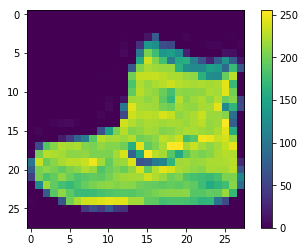

In [65]:
# Inspecting the first image in the training set allows us to see that the
#  pixel values fall in the range of 0 to 255
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [66]:
# Lets scale the values to a range of 0 to 1 before feeding
#  the neural network - so divide each by 255
# NOTE: it is important that the training set AND the testing set are
#  preprocessed in the same way
train_images = train_images / 255.0
test_images = test_images / 255.0

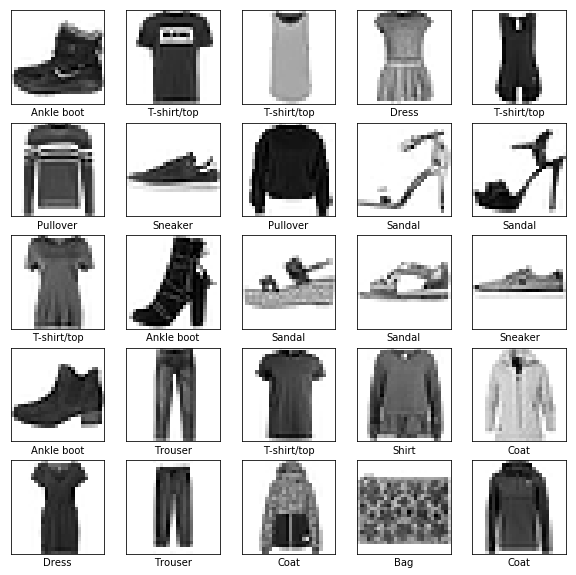

In [67]:
# Display the first 25 images from the training set and diplay class name
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()    

In [68]:
'''
To build the neural network, we need to configure the layers of the model,
then compile the model, then train the model
'''
model = keras.Sequential([
    # First layer transforms the format of images from a 2d array (of 28x28 pixels)
    # To a 1d array of 28 * 28 (784) pixels
    keras.layers.Flatten(input_shape=(28,28)),
    # Second layer (dense, fully connected) has 128 nodes (or neurons)
    keras.layers.Dense(128, activation=tf.nn.relu),
    # Third layer, softmax layer, returns an array of 10 probability scores
    #  that sum to 1
    # Each node contains a score that indicates the probability that the 
    #  current image belongs to one of the 10 classes
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [69]:
'''
Before the model is ready for training, we need to add settings
during the compile step:

Loss function - measures how accurate the model is during training.
  We want to minimize the loss function to "steer" the model in the
   right direction
   
Optimizer - how the model is updated based on the data it sees and 
  its loss function
  
Metrics - used to monitor the training and testing steps. Below, we will
  use accuracy, teh fraction of images that are correctly classified
'''
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [70]:
# Train the model
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 7s 115us/step - loss: 0.4961 - acc: 0.8258
Epoch 2/5
60000/60000 [==============================] - 6s 97us/step - loss: 0.3715 - acc: 0.8654
Epoch 3/5
60000/60000 [==============================] - 6s 101us/step - loss: 0.3318 - acc: 0.8792
Epoch 4/5
60000/60000 [==============================] - 7s 108us/step - loss: 0.3078 - acc: 0.8884
Epoch 5/5
60000/60000 [==============================] - 6s 99us/step - loss: 0.2922 - acc: 0.8933


In [71]:
# Compare how to model performs on the test dataset
test_loss, test_acc = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 37us/step


In [72]:
print('Loss', test_loss)

Loss 0.35604548439979555


In [73]:
print('Accuracy', test_acc)

Accuracy 0.871


In [74]:
'''
Now that the model is trained, we are ready to make
  predictions about test images
A prediction is an array of 10 numbers
  These numbers describe the confidence of the model
  that the image corresponds to each of the 10 different articles of clothes
'''
predictions = model.predict(test_images)
predictions[0]

array([9.2460022e-07, 7.5996593e-07, 2.1325755e-07, 1.5178735e-07,
       1.0027504e-06, 1.3634454e-02, 1.3378149e-06, 2.6850030e-02,
       4.2081583e-06, 9.5950687e-01], dtype=float32)

In [75]:
# Lets see which label has the highest confidence value
np.argmax(predictions[0])

9

In [76]:
# So the model thinks that this image is the value below
class_names[9]

'Ankle boot'

In [77]:
# We can verify our model by checking the test label
test_labels[0]

9

In [78]:
# We can graph this to look at the full set of 10 channels
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


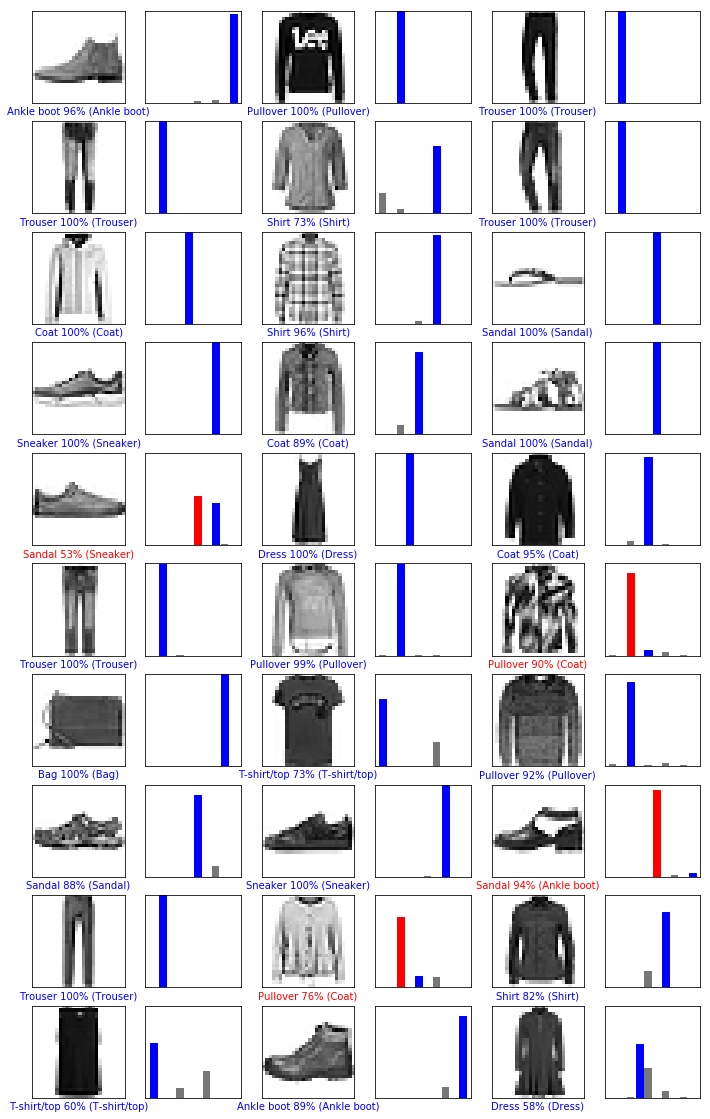

In [79]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)


---- Items from the homework ----

In [80]:
import numpy as np
import matplotlib.image as mpimg

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])


def getFilePaths(num_files):
    files = []
    for x in range(num_files):
        files.append('img_' + str(x) + '.jpg')
    return files

rgb2gray(mpimg.imread('img_0.jpg'))

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]])

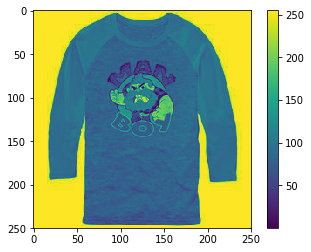

In [81]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = mpimg.imread('img_2.jpg')     
gray = rgb2gray(img)    
plt.figure()
plt.imshow(gray)
plt.colorbar()
plt.grid(False)
plt.show()
#plt.imshow(gray, cmap = plt.get_cmap('gray'))
#plt.show()

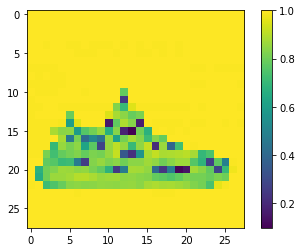

In [94]:
from PIL import Image
im = Image.open('img_0.jpg')
im2 = im.resize((28, 28))
arr = np.array(im2)
gray = rgb2gray(arr)
gray = gray/255.0
plt.figure()
plt.imshow(gray)
plt.colorbar()
plt.grid(False)
plt.show()


[[8.9967105e-12 1.3431765e-13 2.3495433e-12 7.4184083e-13 7.0519138e-14
  4.9993509e-19 5.9928557e-10 5.6617535e-16 1.0000000e+00 2.2393222e-19]]


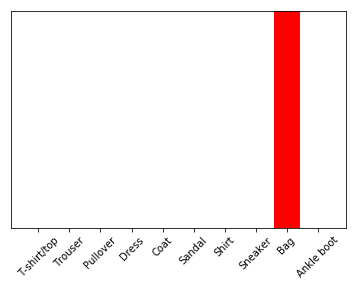

In [91]:
batch = (np.expand_dims(gray,0))
predictions_single = model.predict(batch)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)